In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 75
bounds = 40
order = 6
robust = True
njobs = 6

In [2]:
%matplotlib inline
df = pd.read_csv('SimStockCoint3.csv', index_col=0)
last = df.shift(1)
df = (df / last).dropna()  # Convert to returns
cols = df.columns

y = df[cols]
titles = {i + 1: stock for i, stock in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=bounds, order=order, robust=robust, njobs=njobs)
rs = recon.unmeasured(y.values, plot=True, titles=titles)

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.187 Seconds
Building M ...
	Done. Took 0.180 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 272 iterations
	Done. Took 0.313 Seconds
Extracting Qis ...
	Done. Took 0.000 Seconds
Learning Convolution for Q(1,2) ...
Learning Convolution for Q(1,3) ...
Learning Convolution for Q(2,1) ...
Learning Convolution for Q(3,2) ...
Learning Convolution for Q(3,1) ...
Learning Convolution for Q(2,3) ...
	Q(2,3) 1 <-- 2: -4.498*(-0.112)^t + -0.845*(-0.159)^t + -6.477*(-0.140)^t + -7.238*(-0.006)^t + -4.340*(0.012)^t + 11.484*(-0.134)^t + 11.914420 * delta(t,0)
		RMSE = 0.000
		Matlab: [ -4.5   -0.11  -0.84  -0.16  -6.48  -0.14  -7.24  -0.01  -4.34   0.01  11.48  -0.13]
	Done. Took 122.562 Seconds
	Q(1,3) 0 <-- 2: -4.498*(-0.112)^t + -0.845*(-0.159)^t + -6.477*(-0.140)^t + -7.238*(-0.006)^t + -4.340*(0.012)^t + 11.484*(-0.134)^t + 11.914420 * d

In [3]:
flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))
        
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('magnitudes([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

magnitudes([-4.49841273689 -0.111883130931 -0.844589293389 -0.158658595682 -6.4773425041 -0.13993740941 -7.23837309456 -0.00573124107757 -4.34008454648 0.0115176358759 11.4843821152 -0.133678737225 ; -4.49841273689 -0.111883130931 -0.844589293389 -0.158658595682 -6.4773425041 -0.13993740941 -7.23837309456 -0.00573124107757 -4.34008454648 0.0115176358759 11.4843821152 -0.133678737225 ; -4.49841273689 -0.111883130931 -0.844589293389 -0.158658595682 -6.4773425041 -0.13993740941 -7.23837309456 -0.00573124107757 -4.34008454648 0.0115176358759 11.4843821152 -0.133678737225 ; -4.49841273689 -0.111883130931 -0.844589293389 -0.158658595682 -6.4773425041 -0.13993740941 -7.23837309456 -0.00573124107757 -4.34008454648 0.0115176358759 11.4843821152 -0.133678737225 ; -4.49841273689 -0.111883130931 -0.844589293389 -0.158658595682 -6.4773425041 -0.13993740941 -7.23837309456 -0.00573124107757 -4.34008454648 0.0115176358759 11.4843821152 -0.133678737225 ; -4.49841273689 -0.111883130931 -0.844589293389 -

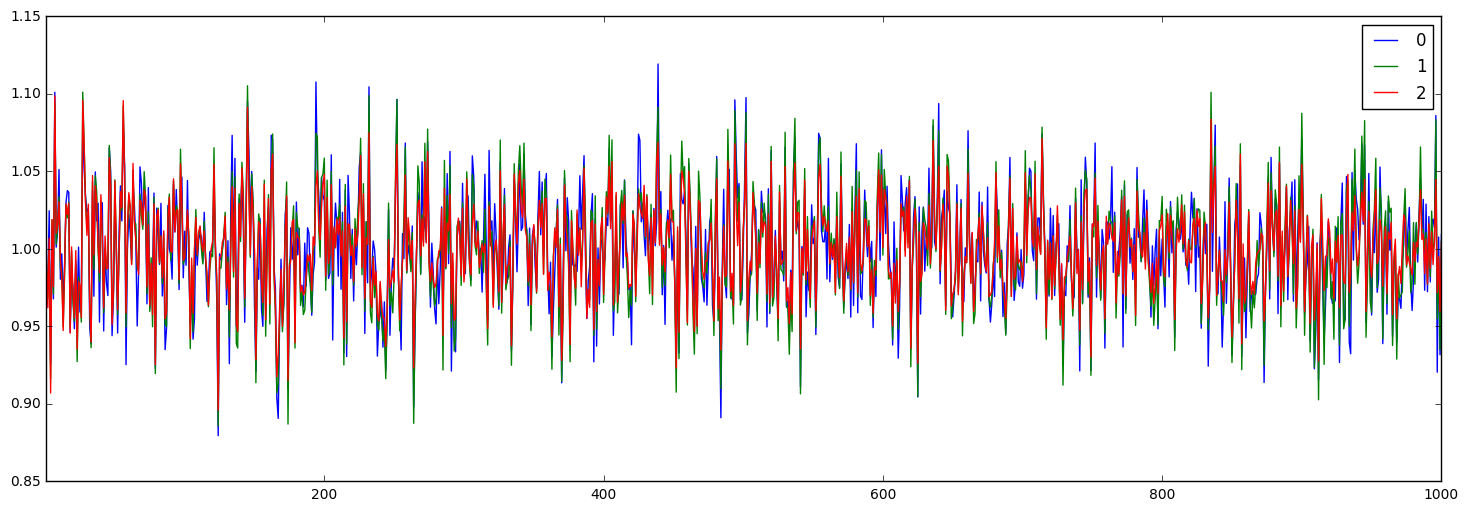

In [4]:
%matplotlib inline
df.plot(figsize=(18,6))